<a href="https://colab.research.google.com/github/MTHNTS008/EEE4022S_FINAL_PROJECT_2019/blob/master/Performance_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.core.pylabtools import figsize

figsize(10, 8)

###Confusion Matrix Numbers

In [0]:

results = pd.DataFrame({'threshold': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                        'tp': [10, 8, 7, 6,  6,  6, 2,  1,  1,  1, 0],
                        'fp': [10, 8, 7, 6,  4,  4, 2,  1,  1,  1,  0],
                        'tn': [0,  2, 3, 4,  5,  5, 8,  9,  9,  9, 10],
                        'fn': [0,  2, 3, 4,  5,  5, 8,  9,  9,  9, 10]
                       })

###Calculate Precision, Recall, F1, TPR, FPR

In [0]:
def calculate_metrics(results):
    roc = pd.DataFrame(index = results['threshold'], columns=['recall', 'precision', 'f1', 'tpr', 'fpr'])
    
    for i in results.iterrows():
        t, tp, fp, tn,fn = i[1]
        sum_ = (tp + fp + tn + fn)
        print('sum',fn)
        assert tp + fp + tn + fn == 20, 'Images must add up to 20'
        
        recall = tp / (tp + fn)
        
        if tp == fp == 0:
            precision = 0
            true_positive_rate = 0
        
        else:
            precision = tp / (tp + fp)
            true_positive_rate = tp / (tp + fn)
            
        if precision == recall == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)
        
        
        false_positive_rate = fp / (fp + tn)
        
        roc.ix[t, 'recall'] = recall
        roc.ix[t, 'precision'] = precision
        roc.ix[t, 'f1'] = f1
        roc.ix[t, 'tpr'] = true_positive_rate
        roc.ix[t, 'fpr'] = false_positive_rate
    
    return roc

In [95]:
roc = calculate_metrics(results)
roc.reset_index()

sum 0.0
sum 2.0
sum 3.0
sum 4.0
sum 5.0
sum 5.0
sum 8.0
sum 9.0
sum 9.0
sum 9.0
sum 10.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: 
.ix is deprecated. Please use
.loc for la

,threshold,recall,precision,f1,tpr,fpr
0,0.0,1,0.5,0.666667,1,1
1,0.1,0.8,0.5,0.615385,0.8,0.8
2,0.2,0.7,0.5,0.583333,0.7,0.7
3,0.3,0.6,0.5,0.545455,0.6,0.6
4,0.4,0.545455,0.6,0.571429,0.545455,0.444444
5,0.5,0.545455,0.6,0.571429,0.545455,0.444444
6,0.6,0.2,0.5,0.285714,0.2,0.2
7,0.7,0.1,0.5,0.166667,0.1,0.1
8,0.8,0.1,0.5,0.166667,0.1,0.1
9,0.9,0.1,0.5,0.166667,0.1,0.1


###Receiver Operating Characteristic Curve

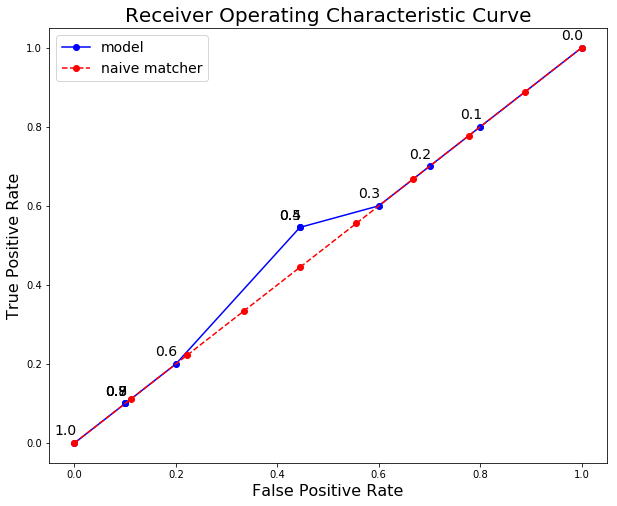

In [93]:
figsize(10, 8)
plt.style.use('seaborn-dark-palette')
thresholds = [str(t) for t in results['threshold']]
plt.plot(roc['fpr'], roc['tpr'], 'bo-', label = 'model');
plt.plot(list(np.linspace(0, 1, num = 10)), list(np.linspace(0, 1, num = 10)), 'ro--', label = 'naive matcher');
for x, y, s in zip(roc['fpr'], roc['tpr'], thresholds):
    plt.text(x - 0.04,y + 0.02, s, fontdict={'size': 14});

plt.legend(prop={'size':14})
plt.ylabel('True Positive Rate', size = 16); plt.xlabel('False Positive Rate', size = 16);
plt.title('Receiver Operating Characteristic Curve', size = 20);